In [165]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

In [166]:
#Load the data file
sleep = pd.read_csv('wearable_tech_sleep_quality_1.csv')
sleep.head()
sleep.columns.to_list()
sleep.dtypes
sleep.info()
sleep.describe()
sleep.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Heart_Rate_Variability  1000 non-null   float64
 1   Body_Temperature        1000 non-null   float64
 2   Movement_During_Sleep   1000 non-null   float64
 3   Sleep_Duration_Hours    1000 non-null   float64
 4   Sleep_Quality_Score     1000 non-null   float64
 5   Caffeine_Intake_mg      1000 non-null   float64
 6   Stress_Level            1000 non-null   float64
 7   Bedtime_Consistency     1000 non-null   float64
 8   Light_Exposure_hours    1000 non-null   float64
dtypes: float64(9)
memory usage: 70.4 KB


,0
Heart_Rate_Variability,0
Body_Temperature,0
Movement_During_Sleep,0
Sleep_Duration_Hours,0
Sleep_Quality_Score,0
Caffeine_Intake_mg,0
Stress_Level,0
Bedtime_Consistency,0
Light_Exposure_hours,0


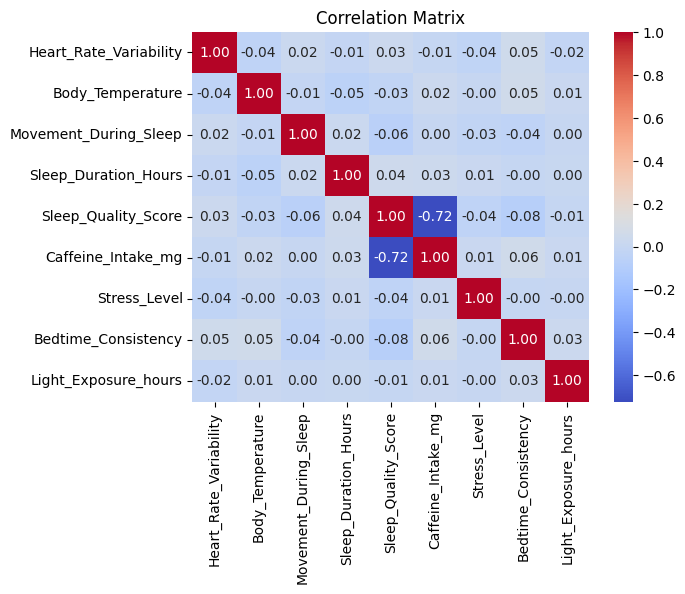

<Figure size 640x480 with 0 Axes>

In [167]:
#Plot the Heatmap
import matplotlib.pyplot as plt
sleep.corr()
sns.heatmap(sleep.corr(),cmap="coolwarm",fmt=".2f",annot=True)
plt.title("Correlation Matrix")
plt.show()
plt.savefig("heatmap.png")

In [168]:
# split the data into Target & the other data:
X=sleep.drop(columns="Sleep_Quality_Score",axis=1)
y=sleep["Sleep_Quality_Score"]
print(np.shape(X),np.shape(y))
# train the data:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


# Initialize models
linear_model = LinearRegression()
tree_model = DecisionTreeRegressor()
forest_model = RandomForestRegressor()

# Train models
linear_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
forest_model.fit(X_train, y_train)

# Make predictions
linear_pred = linear_model.predict(X_test)
tree_pred = tree_model.predict(X_test)
forest_pred = forest_model.predict(X_test)

#create a mini df
selected_columns = ['Sleep_Duration_Hours', 'Caffeine_Intake_mg', 'Sleep_Quality_Score']
df = sleep[selected_columns]
# split the data into Target & the other data:
Xnew=df.drop(columns="Sleep_Quality_Score",axis=1)
ynew=sleep["Sleep_Quality_Score"]

# train the data:
Xnew_train,Xnew_test,ynew_train,ynew_test=train_test_split(Xnew,ynew,test_size=0.3,random_state=42)
forest_model.fit(Xnew_train, ynew_train)
# Make predictions
forest_pred = forest_model.predict(Xnew)
df['forest_pred'] = forest_pred

# Filter rows where 'forest_pred' is greater than 8
filtered_df = df[df['forest_pred'] > 8]
filtered_df.describe()

(1000, 8) (1000,)


,Sleep_Duration_Hours,Caffeine_Intake_mg,Sleep_Quality_Score,forest_pred
count,122.000000,122.000000,122.000000,122.000000
mean,7.566603,5.228432,9.600399,9.630559
std,1.439703,8.697370,0.653663,0.557206
min,3.914543,0.000000,7.122153,8.043602
25%,6.716476,0.000000,9.333145,9.430722
50%,7.597006,0.000000,10.000000,9.955146
75%,8.631442,9.561609,10.000000,9.997312
max,10.907175,28.341920,10.000000,10.000000


In [170]:
# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)

    print(f"Model: {model_name}")
    print(f" MSE: {mse:.2f}")
    print(f" RMSE: {rmse:.2f}")
    print(f" R-squared: {r2:.2f}")
    print(f" MAE: {mae:.2f}")
    print("-" * 20)

evaluate_model(y_test, linear_pred, "Linear Regression")
evaluate_model(y_test, tree_pred, "Decision Tree Regression")
forest_pred_test = forest_model.predict(Xnew_test)
evaluate_model(y_test, forest_pred_test, "Random Forest Regression")

Model: Linear Regression
 MSE: 4.05
 RMSE: 2.01
 R-squared: 0.55
 MAE: 1.66
--------------------
Model: Decision Tree Regression
 MSE: 0.13
 RMSE: 0.36
 R-squared: 0.99
 MAE: 0.15
--------------------
Model: Random Forest Regression
 MSE: 0.09
 RMSE: 0.30
 R-squared: 0.99
 MAE: 0.13
--------------------


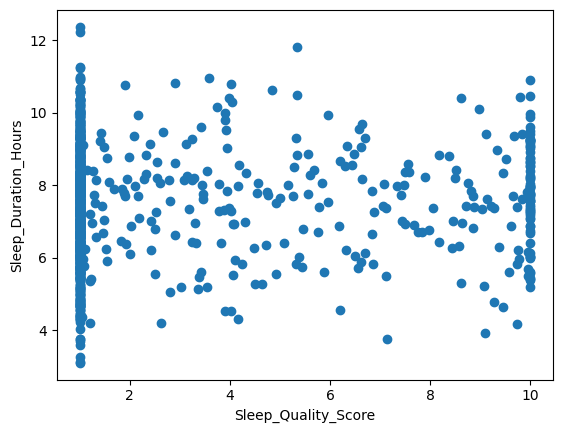

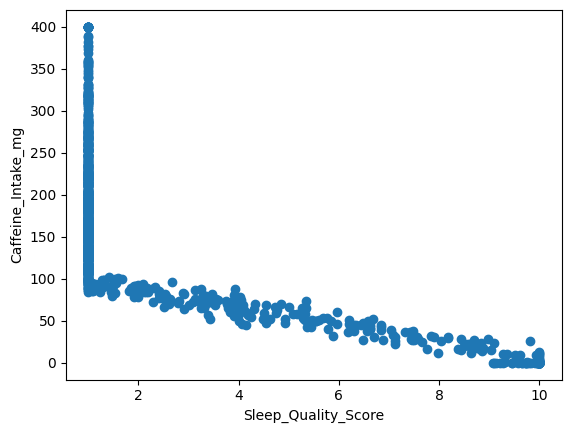

<Figure size 640x480 with 0 Axes>

In [171]:
#Scatter plot of Sleep Quality Score versus Sleep Duration Hours
plt.scatter(sleep['Sleep_Quality_Score'],sleep['Sleep_Duration_Hours'])
plt.xlabel('Sleep_Quality_Score')
plt.ylabel('Sleep_Duration_Hours')
plt.show()
plt.savefig('scatter_plot_Sleep_Duration_Hours.png')

#Scatter plot of Sleep Quality Score versus Caffeine
plt.scatter(sleep['Sleep_Quality_Score'],sleep['Caffeine_Intake_mg'])
plt.xlabel('Sleep_Quality_Score')
plt.ylabel('Caffeine_Intake_mg')
plt.show()
plt.savefig('scatter_plot_Caffeine_Intake_mg.png')

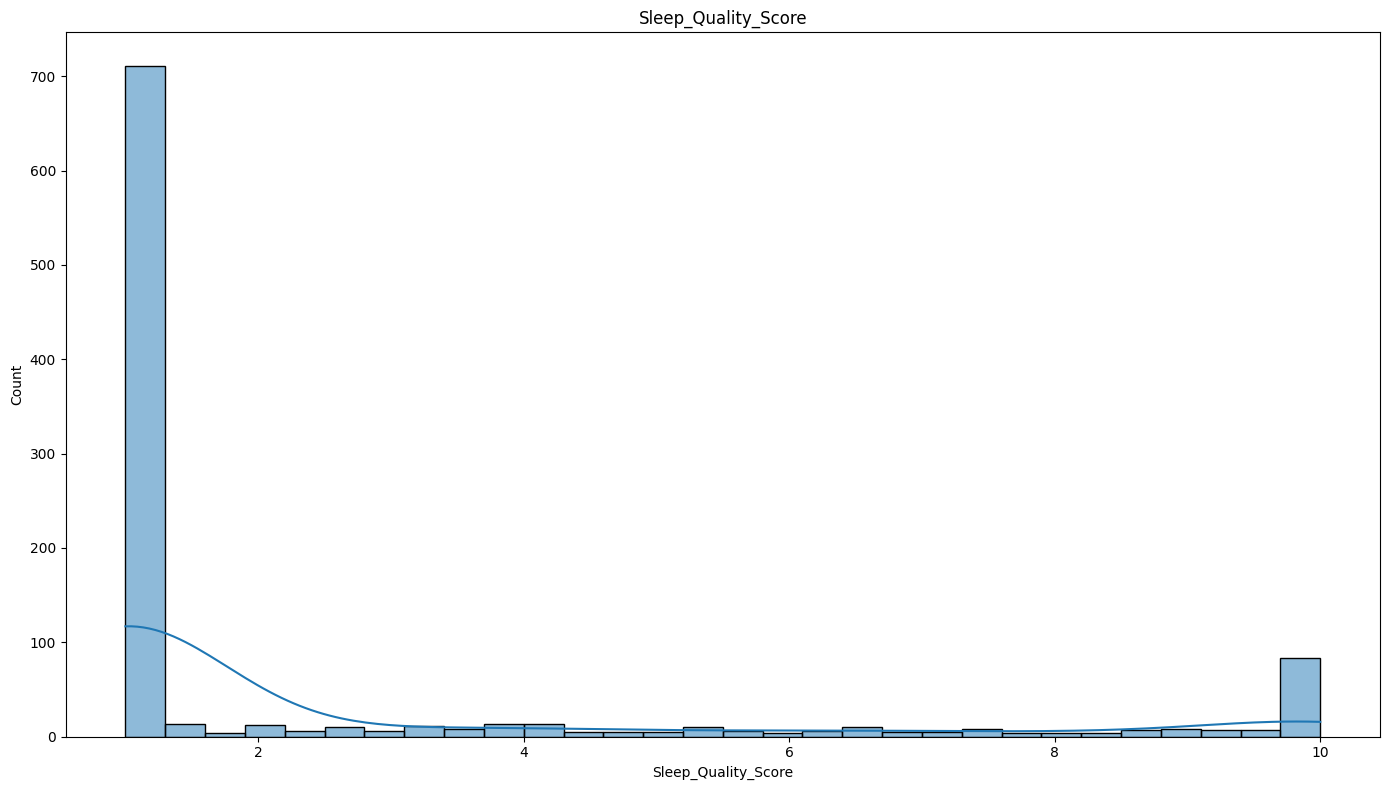

<Figure size 640x480 with 0 Axes>

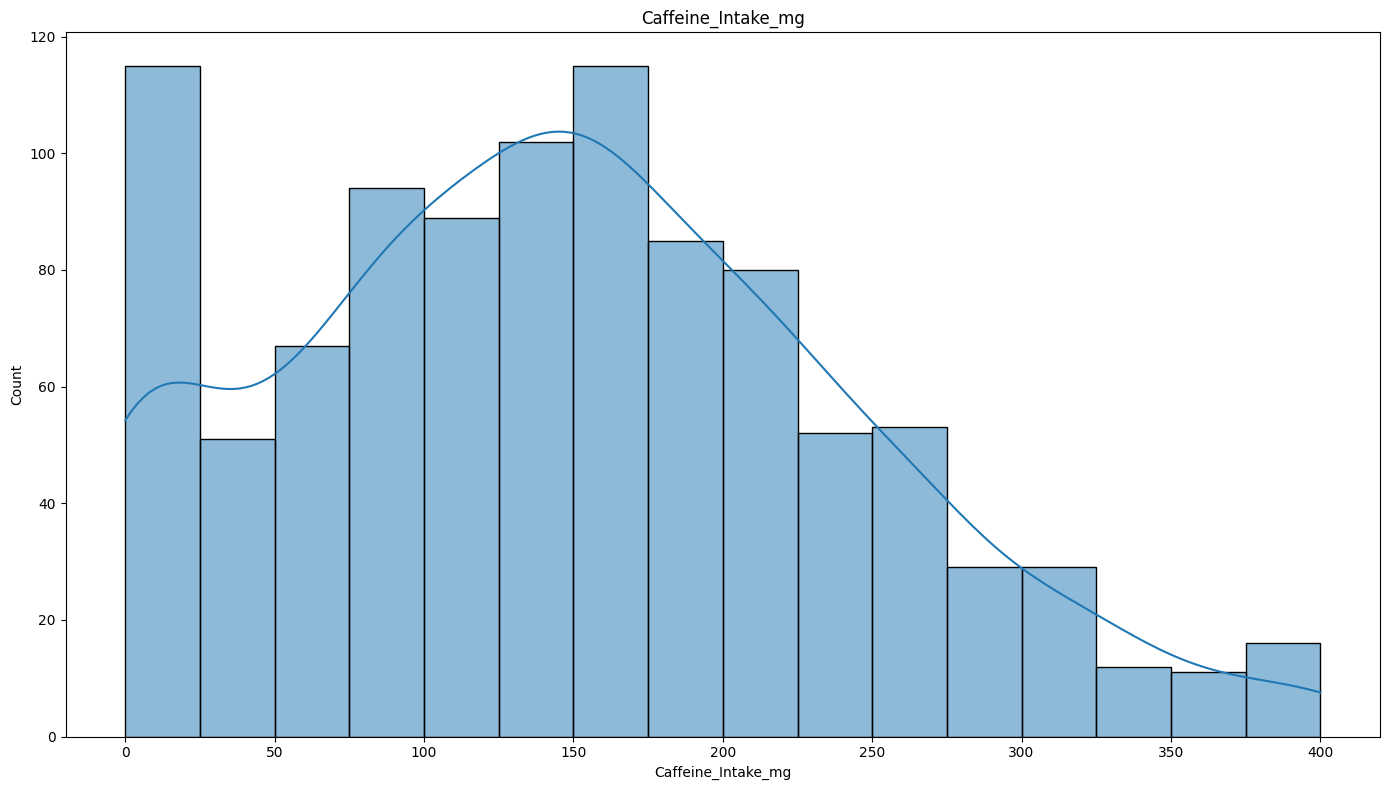

<Figure size 640x480 with 0 Axes>

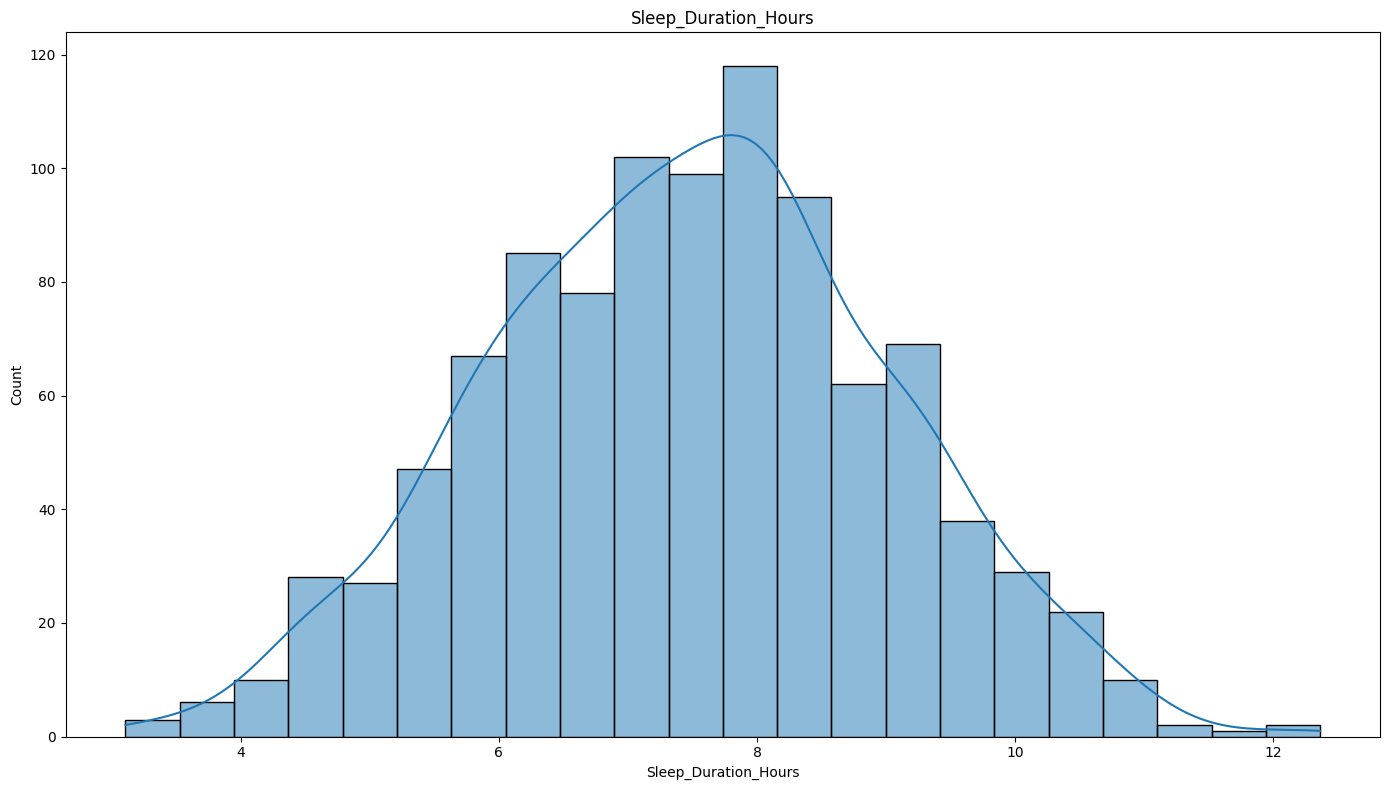

<Figure size 640x480 with 0 Axes>

In [172]:
#Histograms
plt.figure(figsize=(14, 8))
sns.histplot(sleep['Sleep_Quality_Score'], kde=True)
plt.title("Sleep_Quality_Score")
plt.tight_layout()
plt.show()
plt.savefig('hist_Sleep_Quality_Score.png')

plt.figure(figsize=(14, 8))
sns.histplot(sleep['Caffeine_Intake_mg'], kde=True)
plt.title("Caffeine_Intake_mg")
plt.tight_layout()
plt.show()
plt.savefig('hist_Caffeine_Intake_mg.png')

plt.figure(figsize=(14, 8))
sns.histplot(sleep['Sleep_Duration_Hours'], kde=True)
plt.title("Sleep_Duration_Hours")
plt.tight_layout()
plt.show()
plt.savefig('hist_Sleep_Duration_Hours.png')


In [173]:
#Repeat the above evaulation now with only Caffeine Intake and SLeep Durations as inputs

sleep_subset = sleep[['Caffeine_Intake_mg', 'Sleep_Duration_Hours', 'Sleep_Quality_Score']]

# split the data into Target & the other data:
X1=sleep_subset.drop(columns="Sleep_Quality_Score",axis=1)
y1=sleep_subset["Sleep_Quality_Score"]
print(np.shape(X1),np.shape(y1))

# train the data:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

# Initialize models
linear_model = LinearRegression()
tree_model = DecisionTreeRegressor()
forest_model = RandomForestRegressor()

# Train models
linear_model.fit(X1_train, y1_train)
tree_model.fit(X1_train, y1_train)
forest_model.fit(X1_train, y1_train)

# Make predictions
linear_pred = linear_model.predict(X1_test)
tree_pred = tree_model.predict(X1_test)
forest_pred = forest_model.predict(X1_test)

# Evaluate models
def evaluate_model(y1_true, y1_pred, model_name):
    mse = mean_squared_error(y1_true, y1_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y1_true, y1_pred)
    mae = mean_absolute_error(y1_true, y1_pred)

    print(f"Model: {model_name}")
    print(f" MSE: {mse:.2f}")
    print(f" RMSE: {rmse:.2f}")
    print(f" R-squared: {r2:.2f}")
    print(f" MAE: {mae:.2f}")
    print("-" * 20)

evaluate_model(y1_test, linear_pred, "Linear Regression")
evaluate_model(y1_test, tree_pred, "Decision Tree Regression")
evaluate_model(y1_test, forest_pred, "Random Forest Regression")

(1000, 2) (1000,)
Model: Linear Regression
 MSE: 4.08
 RMSE: 2.02
 R-squared: 0.55
 MAE: 1.66
--------------------
Model: Decision Tree Regression
 MSE: 0.20
 RMSE: 0.44
 R-squared: 0.98
 MAE: 0.19
--------------------
Model: Random Forest Regression
 MSE: 0.09
 RMSE: 0.30
 R-squared: 0.99
 MAE: 0.13
--------------------


In [174]:
features=sleep_subset.select_dtypes("number").columns
for col in features:
    Q1_col,Q3_col=sleep_subset[col].quantile([0.25,0.75])
    iqr=Q3_col-Q1_col
    low_limit=Q1_col-1.5*iqr
    upper_limit=Q3_col+1.5*iqr
    outlier=[]
    for x in sleep_subset[col]:
         if ((x> upper_limit) or (x<low_limit)):
             outlier.append(x)
    if len(outlier)==0:
        print(f" * -- >> there No outlier in {col} feature")
    else:
        print(f"The outlier in this feature {col}")

    print(f"Q1 of {col} --->>> {Q1_col} \n Q3 of {col} ---->>> {Q3_col} \n iqr--->>{iqr}\n low_limit--->>>{low_limit} \n  upper_limit--->>> {upper_limit} \n outlier---->>> {outlier} \n Number of outliers --->>> {len(outlier)}")
    print("-"*25)

 * -- >> there No outlier in Caffeine_Intake_mg feature
Q1 of Caffeine_Intake_mg --->>> 80.6307193350093 
 Q3 of Caffeine_Intake_mg ---->>> 211.24468458977066 
 iqr--->>130.61396525476135
 low_limit--->>>-115.29022854713273 
  upper_limit--->>> 407.16563247191266 
 outlier---->>> [] 
 Number of outliers --->>> 0
-------------------------
The outlier in this feature Sleep_Duration_Hours
Q1 of Sleep_Duration_Hours --->>> 6.393869319261787 
 Q3 of Sleep_Duration_Hours ---->>> 8.500418116051645 
 iqr--->>2.1065487967898573
 low_limit--->>>3.2340461240770013 
  upper_limit--->>> 11.66024131123643 
 outlier---->>> [3.139517671017538, 11.802604583500152, 3.1058269649965977, 12.3646394543921, 12.228085101768126] 
 Number of outliers --->>> 5
-------------------------
The outlier in this feature Sleep_Quality_Score
Q1 of Sleep_Quality_Score --->>> 1.0 
 Q3 of Sleep_Quality_Score ---->>> 2.537789335278948 
 iqr--->>1.5377893352789478
 low_limit--->>>-1.3066840029184217 
  upper_limit--->>> 4.844

In [175]:
def remove_outliers_iqr(df, column):
    """Removes outliers from a DataFrame column using the IQR method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

for column in ['Caffeine_Intake_mg', 'Sleep_Duration_Hours', 'Sleep_Quality_Score']:
    df_no_outliers = remove_outliers_iqr(sleep_subset, column)
    print(f"Original DataFrame:\n", sleep_subset)
    print(f"\nDataFrame without outliers in {column}:\n", df_no_outliers)

#Remove duplicates
df_no_duplicates = df_no_outliers.drop_duplicates()

# Remove null rows
df_cleaned = df_no_duplicates.dropna()

Original DataFrame:
      Caffeine_Intake_mg  Sleep_Duration_Hours  Sleep_Quality_Score
0            107.624032              4.638289             1.000000
1            104.658589              6.209422             1.000000
2              0.000000              6.879592            10.000000
3            116.990981             10.331531             1.000000
4            223.282908              8.334830             1.000000
..                  ...                   ...                  ...
995          167.146932              7.542686             1.000000
996          265.264810              4.383282             1.000000
997           28.259621              7.019553             8.445252
998          196.795042              9.965067             1.000000
999           32.971929              8.040972             7.075445

[1000 rows x 3 columns]

DataFrame without outliers in Caffeine_Intake_mg:
      Caffeine_Intake_mg  Sleep_Duration_Hours  Sleep_Quality_Score
0            107.624032        

In [176]:
# split the data into Target & the other data:
X2=df_cleaned.drop(columns="Sleep_Quality_Score",axis=1)
y2=df_cleaned["Sleep_Quality_Score"]
print(np.shape(X2),np.shape(y2))

# train the data:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

# Initialize models
linear_model = LinearRegression()
tree_model = DecisionTreeRegressor()
forest_model = RandomForestRegressor()

# Train models
linear_model.fit(X2_train, y2_train)
tree_model.fit(X2_train, y2_train)
forest_model.fit(X2_train, y2_train)

# Make predictions
linear_pred = linear_model.predict(X2_test)
tree_pred = tree_model.predict(X2_test)
forest_pred = forest_model.predict(X2_test)

# Evaluate models
def evaluate_model(y2_true, y2_pred, model_name):
    mse = mean_squared_error(y2_true, y2_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y2_true, y2_pred)
    mae = mean_absolute_error(y2_true, y2_pred)

    print(f"Model: {model_name}")
    print(f" MSE: {mse:.2f}")
    print(f" RMSE: {rmse:.2f}")
    print(f" R-squared: {r2:.2f}")
    print(f" MAE: {mae:.2f}")
    print("-" * 20)

evaluate_model(y2_test, linear_pred, "Linear Regression")
evaluate_model(y2_test, tree_pred, "Decision Tree Regression")
evaluate_model(y2_test, forest_pred, "Random Forest Regression")

(816, 2) (816,)
Model: Linear Regression
 MSE: 0.38
 RMSE: 0.62
 R-squared: 0.18
 MAE: 0.45
--------------------
Model: Decision Tree Regression
 MSE: 0.08
 RMSE: 0.28
 R-squared: 0.83
 MAE: 0.08
--------------------
Model: Random Forest Regression
 MSE: 0.05
 RMSE: 0.23
 R-squared: 0.88
 MAE: 0.07
--------------------


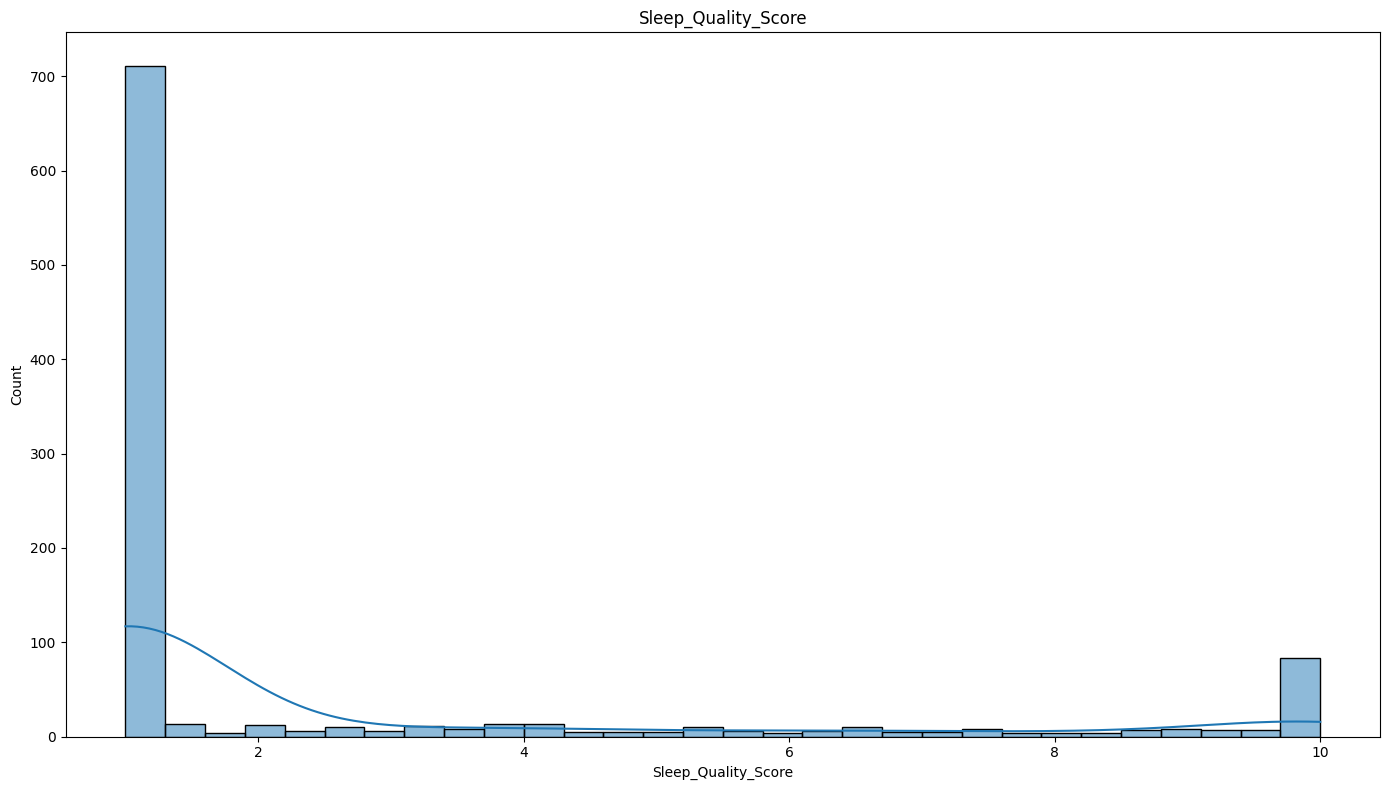

<Figure size 640x480 with 0 Axes>

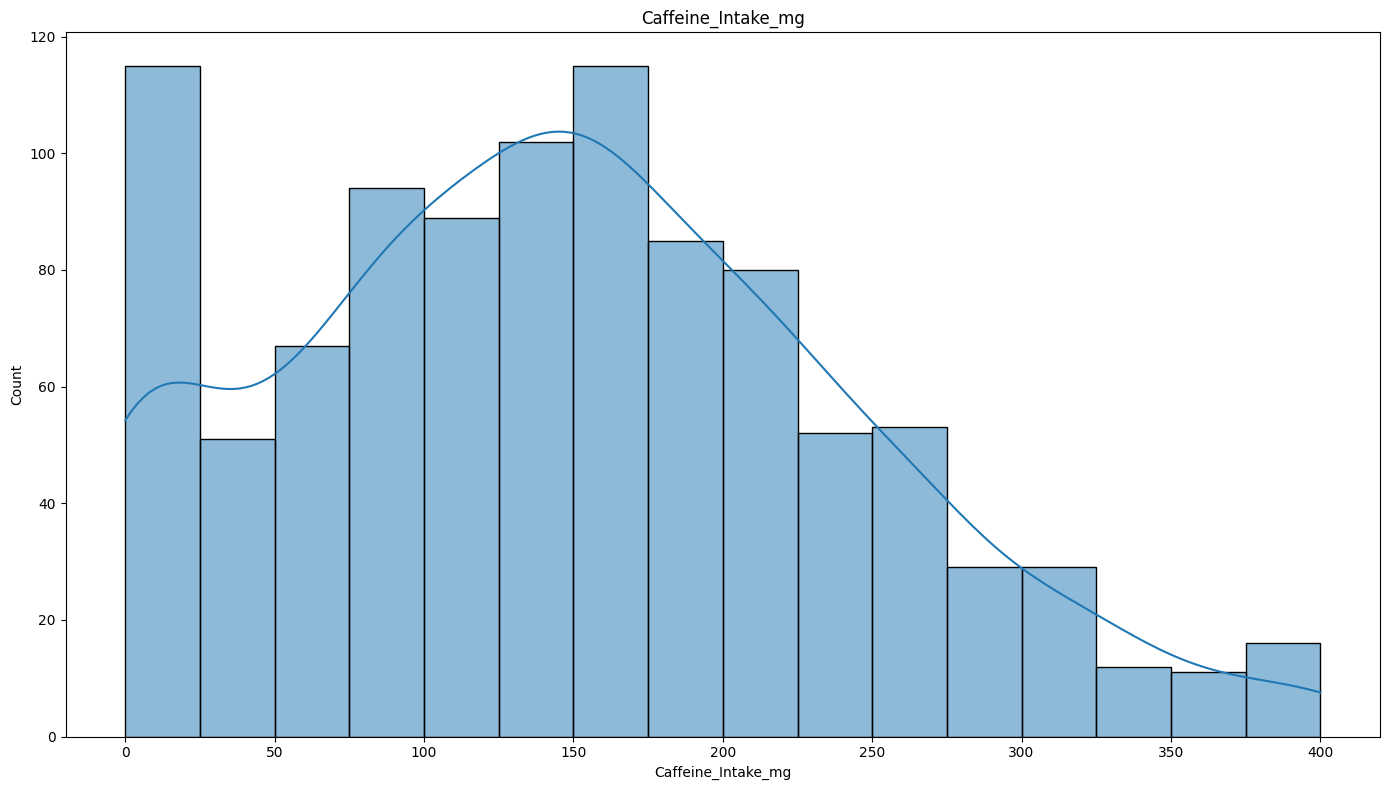

<Figure size 640x480 with 0 Axes>

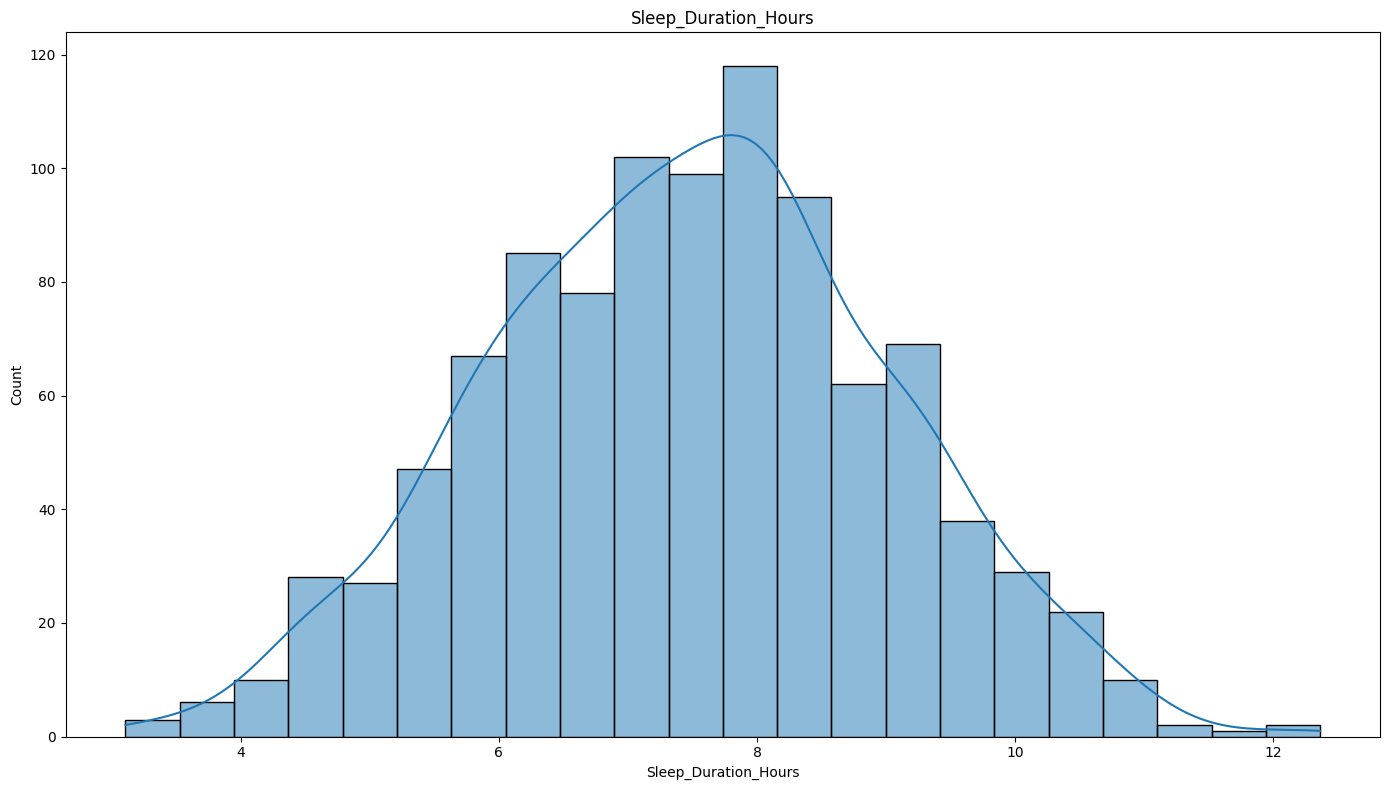

<Figure size 640x480 with 0 Axes>

In [177]:
#Histograms
plt.figure(figsize=(14, 8))
sns.histplot(sleep['Sleep_Quality_Score'], kde=True)
plt.title("Sleep_Quality_Score")
plt.tight_layout()
plt.show()
plt.savefig('hist_Sleep_Quality_Score.png')

plt.figure(figsize=(14, 8))
sns.histplot(sleep['Caffeine_Intake_mg'], kde=True)
plt.title("Caffeine_Intake_mg")
plt.tight_layout()
plt.show()
plt.savefig('hist_Caffeine_Intake_mg.png')

plt.figure(figsize=(14, 8))
sns.histplot(sleep['Sleep_Duration_Hours'], kde=True)
plt.title("Sleep_Duration_Hours")
plt.tight_layout()
plt.show()
plt.savefig('hist_Sleep_Duration_Hours.png')


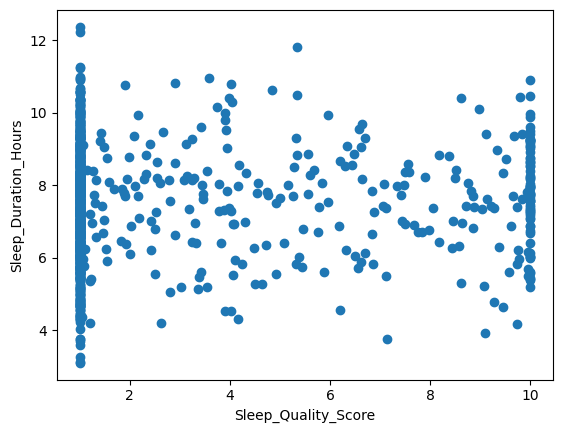

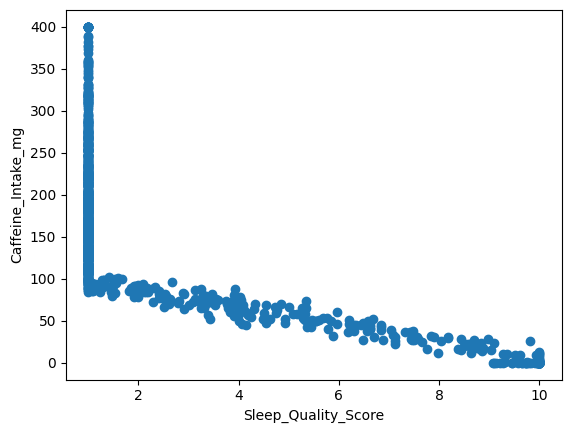

<Figure size 640x480 with 0 Axes>

In [178]:
#Scatter plot of Sleep Quality Score versus Sleep Duration Hours
plt.scatter(sleep['Sleep_Quality_Score'],sleep['Sleep_Duration_Hours'])
plt.xlabel('Sleep_Quality_Score')
plt.ylabel('Sleep_Duration_Hours')
plt.show()
plt.savefig('new_scatter_plot_Sleep_Duration_Hours.png')

#Scatter plot of Sleep Quality Score versus Caffeine
plt.scatter(sleep['Sleep_Quality_Score'],sleep['Caffeine_Intake_mg'])
plt.xlabel('Sleep_Quality_Score')
plt.ylabel('Caffeine_Intake_mg')
plt.show()
plt.savefig('new_scatter_plot_Caffeine_Intake_mg.png')

In [179]:
#REGULARIZATION TECHNIQUES (RIDGE, LASSO AND ELASTIC NET)
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

# L1 Regularization (Lasso)
lasso = Lasso(alpha=0.1)  # alpha is the regularization strength
lasso.fit(X2_train, y2_train)
y2_pred_lasso = lasso.predict(X2_test)
mse_lasso = mean_squared_error(y2_test, y2_pred_lasso)
print("Lasso Mean Squared Error:", mse_lasso)
rmse_lasso = np.sqrt(mse_lasso)
print("Lasso Root Mean Squared Error:", rmse_lasso)
r2_lasso = r2_score(y2_test, y2_pred_lasso)
print("Lasso R-squared:", r2_lasso)
mae_lasso = mean_absolute_error(y2_test, y2_pred_lasso)
print("Lasso Mean Absolute Error:", mae_lasso)

# L2 Regularization (Ridge)
ridge = Ridge(alpha=0.1)  # alpha is the regularization strength
ridge.fit(X2_train, y2_train)
y2_pred_ridge = ridge.predict(X2_test)
mse_ridge = mean_squared_error(y2_test, y2_pred_ridge)
print("Ridge Mean Squared Error:", mse_ridge)
rmse_ridge = np.sqrt(mse_ridge)
print("Ridge Root Mean Squared Error:", rmse_ridge)
r2_ridge = r2_score(y2_test, y2_pred_ridge)
print("Ridge R-squared:", r2_ridge)
mae_ridge = mean_absolute_error(y2_test, y2_pred_ridge)
print("Ridge Mean Absolute Error:", mae_ridge)

# Elastic Net Regularization
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  # alpha is the regularization strength, l1_ratio controls the mix of L1 and L2
elastic_net.fit(X2_train, y2_train)
y2_pred_elastic = elastic_net.predict(X2_test)
mse_elastic = mean_squared_error(y2_test, y2_pred_elastic)
print("Elastic Net Mean Squared Error:", mse_elastic)
rmse_elastic = np.sqrt(mse_elastic)
print("Elastic Root Mean Squared Error:", rmse_elastic)
r2_elastic = r2_score(y2_test, y2_pred_elastic)
print("Elastic Net R-squared:", r2_elastic)
mae_elastic = mean_absolute_error(y2_test, y2_pred_elastic)
print("Elastic Mean Absolute Error:", mae_elastic)

Lasso Mean Squared Error: 0.37848578041096687
Lasso Root Mean Squared Error: 0.6152119800613175
Lasso R-squared: 0.19511667464386317
Lasso Mean Absolute Error: 0.439984787171763
Ridge Mean Squared Error: 0.38476734286482545
Ridge Root Mean Squared Error: 0.6202961735049036
Ridge R-squared: 0.18175837919930482
Ridge Mean Absolute Error: 0.44502965704423714
Elastic Net Mean Squared Error: 0.38071133478650687
Elastic Root Mean Squared Error: 0.617018099237378
Elastic Net R-squared: 0.1903838373768978
Elastic Mean Absolute Error: 0.4420106702326671


In [180]:
#DATA TRANSFORMATION USING LOG AND POLYNOMIAL
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

import pandas as pd
import numpy as np

def create_polynomial_features(df, degree=2, include_bias=False):
    """
    Transforms a DataFrame by adding polynomial features.

    Args:
        df (pd.DataFrame): The input DataFrame with numerical data.
        degree (int): The degree of the polynomial features. Default is 2.
        include_bias (bool): Whether to include a bias (intercept) column. Default is False.

    Returns:
         pd.DataFrame: A new DataFrame with polynomial features.
    """
    poly = PolynomialFeatures(degree=degree, include_bias=include_bias)
    poly_features = poly.fit_transform(df)

    # Create column names for the new features
    column_names = poly.get_feature_names_out(df.columns)

    # Convert back to dataframe
    df_poly = pd.DataFrame(poly_features, columns=column_names, index=df.index)
    return df_poly

df_poly = create_polynomial_features(df_cleaned, degree=2)
df_poly.head()
# split the data into Target & the other data:
X_poly=df_poly[["Sleep_Duration_Hours^2", "Caffeine_Intake_mg^2"]]
y_poly=df_poly["Sleep_Quality_Score^2"]


def transform_df_log(df):
    """
    Transforms all numerical columns in a DataFrame to their natural logarithm.

    Args:
        df (pd.DataFrame): The input DataFrame.

    Returns:
         pd.DataFrame: A new DataFrame with log-transformed numerical columns.
    """
    df_transformed = df.copy()
    for col in df_transformed.select_dtypes(include=np.number).columns:
        # Apply log transformation, handling 0 and negative values
        df_transformed[col] = df_transformed[col].apply(lambda x: np.log(x) if x > 0 else np.nan)
    return df_transformed

df_log_transformed = transform_df_log(df_cleaned)
# split the data into Target & the other data:
X_log=df_cleaned.drop(columns="Sleep_Quality_Score",axis=1)
y_log=df_cleaned["Sleep_Quality_Score"]
print(np.shape(X_log),np.shape(y_log))

# train the data:
X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X_log, y_log, test_size=0.3, random_state=42)

forest_model = RandomForestRegressor()
forest_model.fit(X_log_train, y_log_train)
forest_pred = forest_model.predict(X_log_test)
mse = mean_squared_error(y_log_test, forest_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)
r2 = r2_score(y_log_test, forest_pred)
print("R-squared:", r2)
mae = mean_absolute_error(y_log_test, forest_pred)
print("Mean Absolute Error:", mae)


(816, 2) (816,)
Mean Squared Error: 0.055652135519279264
Root Mean Squared Error: 0.2359070484730782
R-squared: 0.8816508354652313
Mean Absolute Error: 0.07082453565198216


In [181]:
#CHECK IF VIF IS ACCEPTABLE
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_cleaned.values, i) for i in range(df_cleaned.shape[1])]
vif["Feature"] = df_cleaned.columns
print(vif)

   VIF Factor               Feature
0    6.009778    Caffeine_Intake_mg
1   10.779390  Sleep_Duration_Hours
2    3.743036   Sleep_Quality_Score


In [182]:
#Use PCA to reduce dimensionality by creating uncorrelated principal components.
from sklearn.decomposition import PCA

# Fit PCA to your data
pca = PCA()
pca.fit(df_cleaned)

# Transform the data
df_pca = pca.transform(df_cleaned)
df_pca = pd.DataFrame(df_pca, columns=[f"PC{i+1}" for i in range(df_pca.shape[1])])

# split the data into Target & the other data:
X_pca=df_pca
y_pca=df_cleaned["Sleep_Quality_Score"]
print(np.shape(X_pca),np.shape(y_pca))

# train the data:
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y_pca, test_size=0.3, random_state=42)
forest_model = RandomForestRegressor()
forest_model.fit(X_pca_train, y_pca_train)
forest_pred = forest_model.predict(X_pca_test)
mse = mean_squared_error(y_pca_test, forest_pred)
print("Mean Squared Error with PCA:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error with PCA:", rmse)
r2 = r2_score(y_pca_test, forest_pred)
print("R-squared with PCA:", r2)
mae = mean_absolute_error(y_pca_test, forest_pred)
print("Mean Absolute Error with PCA:", mae)

(816, 3) (816,)
Mean Squared Error with PCA: 0.0006006229874568028
Root Mean Squared Error with PCA: 0.024507610806784142
R-squared with PCA: 0.9987227223519345
Mean Absolute Error with PCA: 0.006997898311629386


,Caffeine_Intake_mg,Sleep_Duration_Hours,Sleep_Quality_Score,forest_pred
count,816.000000,816.000000,816.000000,816.000000
mean,177.556094,7.441501,1.262971,1.272267
std,77.912937,1.557976,0.765776,0.764735
min,44.877997,3.105827,1.000000,1.000000
25%,116.973863,6.355621,1.000000,1.000000
50%,163.667202,7.434669,1.000000,1.000000
75%,224.551599,8.425991,1.000000,1.000000
max,400.000000,12.364639,4.764231,4.601436
